In [25]:
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [26]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

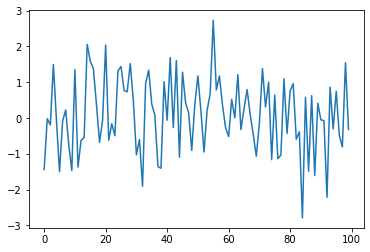

In [27]:
df.Stationary.plot()

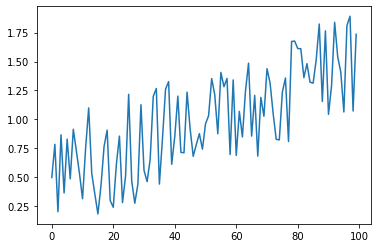

In [28]:
df.Nonstationary.plot()

In [29]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Stationary)

(-6.7432681238512,
 3.0802249165900616e-09,
 2,
 97,
 {'1%': -3.4996365338407074,
  '5%': -2.8918307730370025,
  '10%': -2.5829283377617176},
 249.47524150430618)

In [30]:
adfuller(df.Nonstationary)

(-0.5246739210757453,
 0.887110947423633,
 6,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 43.64471716876005)

In [31]:
# Convert to stationary data by taking the `pct_change` of the non-stationary data.
df['Returns'] = df.Nonstationary.pct_change()

In [32]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

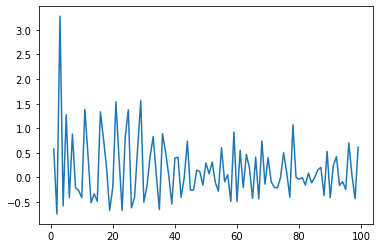

In [33]:
# Plot the returns as a line chart
# You should no longer see the upward trend int he data
df.Returns.plot()

In [34]:
# Subtract the upward trend for the non-stationary data using the `diff()` function
df['Diff'] = df.Nonstationary.diff()

In [35]:
# Drop the NaNs created from the diff function
df = df.dropna()

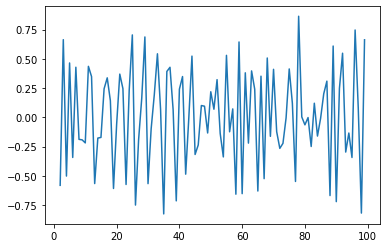

In [36]:
df.Diff.plot()